In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
import nmrglue as ng
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [55]:
from trentnmr import *

In [56]:
# data_folder = '/home/tyler/data/Sep-2016-23Na/VT/*.fid'
data_folder = '/home/tylerbiggs/data/Sep-2016-23Na/VT/*.fid'

In [57]:
data_files = sorted(glob.glob(data_folder))
# data_files

In [58]:
# Make a dictionary using the paths as keys, this way
# I will not lose them.
data_dict = {f: read_varian_as_nmrpipe(f) for f in data_files}
# data_dict  # Very long output.

In [59]:
processed_dict = {f: process_fid(value[0], value[1]) for f, value in data_dict.items()}
# processed_dict

Optimization terminated successfully.
         Current function value: 34701.679688
         Iterations: 63
         Function evaluations: 128
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.005859
         Iterations: 56
         Function evaluations: 107
Optimization terminated successfully.
         Current function value: 0.000977
         Iterations: 60
         Function evaluations: 118
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 59
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.001953
         Iterations: 58
         Function evaluations: 113
Optimization terminated successfully.
         Current function value: 0.003906
         Iterations: 59
         Function evaluations: 110
Optimization terminated

In [76]:
peak_dict = {f: find_nmr_peaks(value[1]) for f, value in processed_dict.items()}
# Peak list is output as:
# Locations, cluster_ids, scales, amps.
# peak_dict

In [79]:
ppm_peak_dict = dict()
for key, value in peak_dict.items():
    # Get the corresponding uc conversion object from the processed_dict.
    uc = processed_dict[key][2]
    ppm_peak_dict[key] = {
        "center": [uc.ppm(peak[0]) for peak in value],
        "ppm_lw": [uc.ppm(peak[2]) for peak in value]
    }
    
# ppm_peak_dict

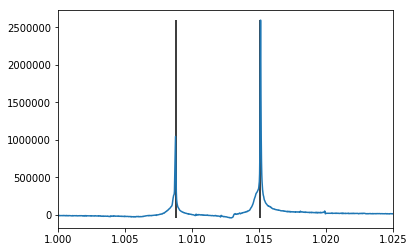

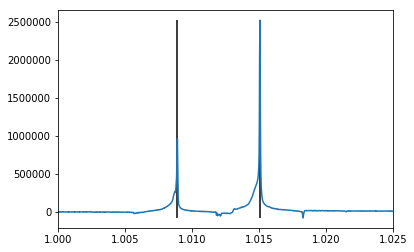

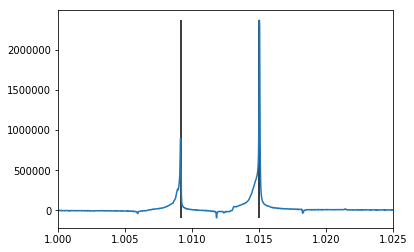

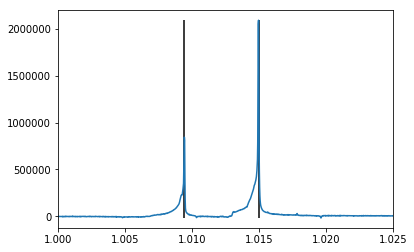

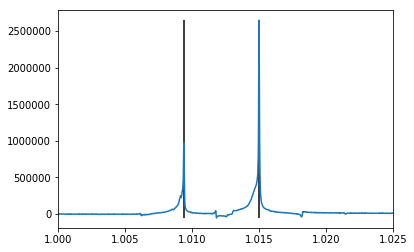

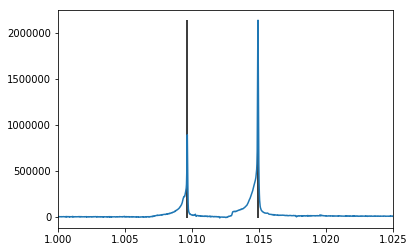

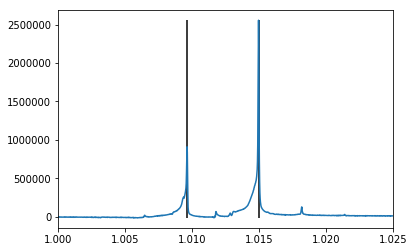

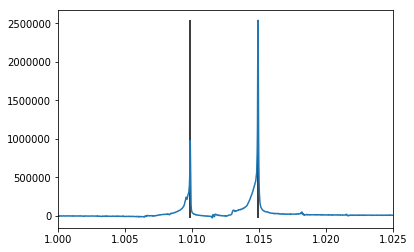

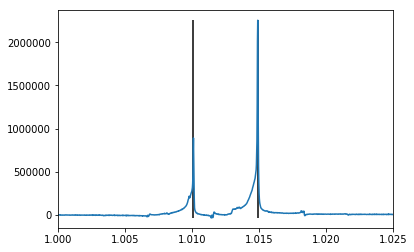

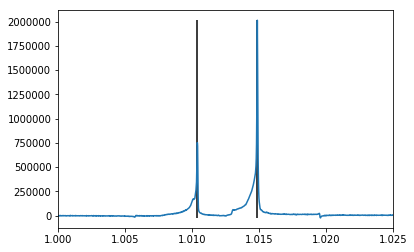

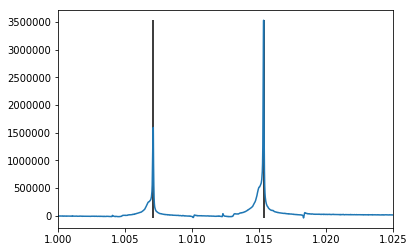

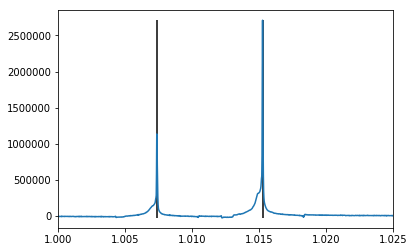

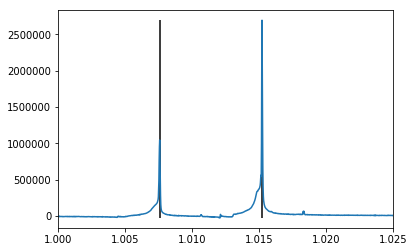

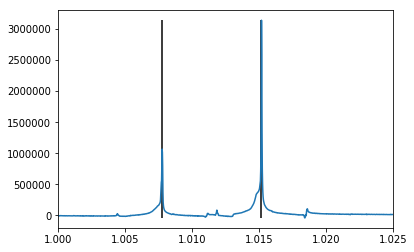

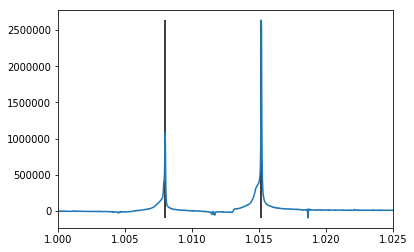

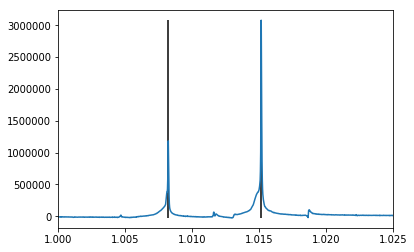

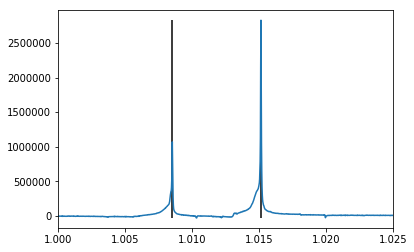

In [74]:
for idx, item in enumerate(processed_dict.items()):
    
    # Unpack the data.
    key, value = item
    dic, data, uc = value
    
    # Get the peaks for this spectra.
    spectra_peaks = ppm_peak_dict[key]
    peak_centers = spectra_peaks['center']
    peak_start = np.min(spectra_peaks['ppm_lw'])
    peak_end = np.max(spectra_peaks['ppm_lw'])
    
    # Create the ppm scale.
    ppm_scale = uc.ppm_scale()
    
    # Plot the nmr data.
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(ppm_scale, data)
    ax.set_xlim(1.0, 1.025)
    
    # Add vlines for the the peak widths.
    [ax.vlines(p, np.min(data), np.max(data)) for p in spectra_peaks]

In [ ]:
# #   plot 0     plot 1    plot 2   plot 3
# x=[[1,2,3,4],[1,4,3,4],[1,2,3,4],[9,8,7,4]]
# y=[[3,2,3,4],[3,6,3,4],[6,7,8,9],[3,2,2,4]]

# plots = zip(x,y)
# def loop_plot(plots):
#     figs={}
#     axs={}
#     for idx,plot in enumerate(plots):
#         figs[idx]=plt.figure()
#         axs[idx]=figs[idx].add_subplot(111)
#         axs[idx].plot(plot[0],plot[1])
# return figs, axs

# figs, axs = loop_plot(plots)